# Analyzing Airplane Accidents using Pandas

https://catalog.data.gov/dataset/aviation-data-and-documentation-from-the-ntsb-accident-database-system-05748

Questions:

* how many accidents occurred in each U.S. state, name of the state with the most aviation accidents
* Count how many fatalities and serious injuries occured during each unique month and year, deadliest month and years
* Count the number of accidents by air carrier.
* Count the number of accidents by airplane make and model.
* Figure out what percentage of accidents occur under adverse weather conditions.
* Map out accidents using the basemap library for matplotlib.


## Exploring the data

In [57]:
import pandas as pd
data = pd.read_csv('AviationData.txt', sep='\ \|\ ')
pd.set_option('display.max_columns', 500)
data.head()

C:\Users\Lourenco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date |
0,20150908X74637,Accident,CEN15LA402,09/08/2015,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,CLARKE REGINALD W,DRAGONFLY MK,NaN,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,1.0,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |
1,20150906X32704,Accident,ERA15LA339,09/05/2015,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,EVOLUTION AIRCRAFT INC,REVO,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,09/10/2015 |
2,20150908X00229,Accident,GAA15CA251,09/04/2015,"Hayes, SD",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,AIR TRACTOR INC,AT 402A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,|
3,20150903X33216,Accident,WPR15FA256,09/03/2015,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,PIPER,PA28,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |
4,20150903X34535,Accident,ERA15LA338,09/03/2015,"Cresskill, NJ",United States,40.935833,-73.958611,NaN,NaN,Non-Fatal,Destroyed,Airplane,N758DK,CESSNA,R172K,No,1.0,Reciprocating,Public Use,NaN,Aerial Observation,NaN,NaN,2.0,NaN,NaN,VMC,NaN,Preliminary,09/10/2015 |


In [58]:
data.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description',
       'Schedule', 'Purpose of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase of Flight', 'Report Status',
       'Publication Date |'],
      dtype='object')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77281 entries, 0 to 77280
Data columns (total 31 columns):
Event Id                  77281 non-null object
Investigation Type        77281 non-null object
Accident Number           77281 non-null object
Event Date                77278 non-null object
Location                  77200 non-null object
Country                   76771 non-null object
Latitude                  23798 non-null float64
Longitude                 23789 non-null float64
Airport Code              43390 non-null object
Airport Name              46121 non-null object
Injury Severity           77188 non-null object
Aircraft Damage           74909 non-null object
Aircraft Category         16561 non-null object
Registration Number       74520 non-null object
Make                      77192 non-null object
Model                     77163 non-null object
Amateur Built             76642 non-null object
Number of Engines         73369 non-null float64
Engine Type             

## Cleaning the data
### Converting numeric columns
All the columns are in text format, let's convert to numerical when possible to facilitate analysis.

In [61]:
num_cols = ['Latitude',
            'Longitude',
            'Number of Engines',
            'Total Fatal Injuries',
            'Total Serious Injuries',
            'Total Minor Injuries',
            'Total Uninjured']

data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77281 entries, 0 to 77280
Data columns (total 31 columns):
Event Id                  77281 non-null object
Investigation Type        77281 non-null object
Accident Number           77281 non-null object
Event Date                77278 non-null object
Location                  77200 non-null object
Country                   76771 non-null object
Latitude                  23798 non-null float64
Longitude                 23789 non-null float64
Airport Code              43390 non-null object
Airport Name              46121 non-null object
Injury Severity           77188 non-null object
Aircraft Damage           74909 non-null object
Aircraft Category         16561 non-null object
Registration Number       74520 non-null object
Make                      77192 non-null object
Model                     77163 non-null object
Amateur Built             76642 non-null object
Number of Engines         73369 non-null float64
Engine Type             

In [63]:
data.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date |
0,20150908X74637,Accident,CEN15LA402,09/08/2015,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,CLARKE REGINALD W,DRAGONFLY MK,NaN,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,1.0,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |
1,20150906X32704,Accident,ERA15LA339,09/05/2015,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,EVOLUTION AIRCRAFT INC,REVO,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,09/10/2015 |
2,20150908X00229,Accident,GAA15CA251,09/04/2015,"Hayes, SD",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,AIR TRACTOR INC,AT 402A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,|
3,20150903X33216,Accident,WPR15FA256,09/03/2015,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,PIPER,PA28,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |
4,20150903X34535,Accident,ERA15LA338,09/03/2015,"Cresskill, NJ",United States,40.935833,-73.958611,NaN,NaN,Non-Fatal,Destroyed,Airplane,N758DK,CESSNA,R172K,No,1.0,Reciprocating,Public Use,NaN,Aerial Observation,NaN,NaN,2.0,NaN,NaN,VMC,NaN,Preliminary,09/10/2015 |


### Creating US state column
Since we're interesting in which US state had the most accidents, we need to extract that information from the location column. Not all accidents took place in the US, so let's restrict our mapping to those rows.

In [71]:
data['US State'] = ''
mask = data['Country'] == 'United States'
data.loc[mask,'US State'] = data.loc[mask,'Location'].str[-2:]
data.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date |,US State
0,20150908X74637,Accident,CEN15LA402,09/08/2015,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,CLARKE REGINALD W,DRAGONFLY MK,NaN,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,1.0,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |,IL
1,20150906X32704,Accident,ERA15LA339,09/05/2015,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,EVOLUTION AIRCRAFT INC,REVO,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,09/10/2015 |,NH
2,20150908X00229,Accident,GAA15CA251,09/04/2015,"Hayes, SD",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,AIR TRACTOR INC,AT 402A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,|,SD
3,20150903X33216,Accident,WPR15FA256,09/03/2015,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,PIPER,PA28,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |,CA
4,20150903X34535,Accident,ERA15LA338,09/03/2015,"Cresskill, NJ",United States,40.935833,-73.958611,NaN,NaN,Non-Fatal,Destroyed,Airplane,N758DK,CESSNA,R172K,No,1.0,Reciprocating,Public Use,NaN,Aerial Observation,NaN,NaN,2.0,NaN,NaN,VMC,NaN,Preliminary,09/10/2015 |,NJ


### Converting Event Date column to datetime format
Converting the dates to datetime format is extremely easy and will speed up the analysis. Creating year and month columns is trivial from there.

In [76]:
data['Event Date'] = pd.to_datetime(data['Event Date'],infer_datetime_format=True)

In [83]:
data['Event Month'] = pd.DatetimeIndex(data['Event Date']).month
data['Event Year'] = pd.DatetimeIndex(data['Event Date']).year

## Answering the questions
### Question 1
* how many accidents occurred in each U.S. state, name of the state with the most aviation accidents


In [100]:
data['US State'].value_counts().head(10)

CA    8030
FL    5118
TX    5112
AK    5049
      4184
AZ    2502
CO    2460
WA    2354
IL    1874
MI    1863
Name: US State, dtype: int64

Most accidents occured in California

### Question 2
* Count how many fatalities and serious injuries occured during each unique month and year, deadliest month and years

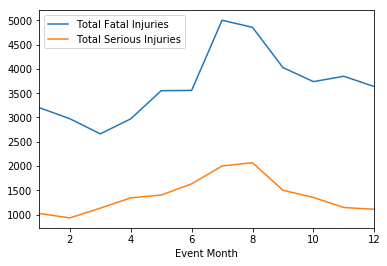

In [89]:
%matplotlib inline
data.groupby('Event Month').sum()[['Total Fatal Injuries', 'Total Serious Injuries']].plot()

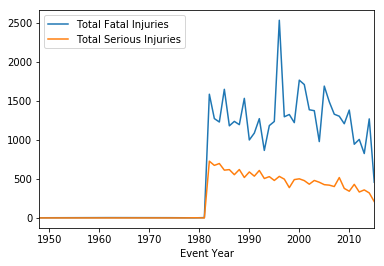

In [91]:
data.groupby('Event Year').sum()[['Total Fatal Injuries', 'Total Serious Injuries']].plot()

### Question 3
* Count the number of accidents by air carrier

In [99]:
data['Air Carrier'].value_counts().head(10)

UNITED AIRLINES               49
AMERICAN AIRLINES             41
CONTINENTAL AIRLINES          25
USAIR                         24
DELTA AIR LINES INC           23
AMERICAN AIRLINES, INC.       22
SOUTHWEST AIRLINES CO         21
CONTINENTAL AIRLINES, INC.    19
UNITED AIR LINES INC          14
AMERICAN AIRLINES INC         12
Name: Air Carrier, dtype: int64

### Question 4
* Count the number of accidents by airplane make and model.

In [98]:
data['Make'] = data['Make'].str.lower()
data['Model'] = data['Model'].str.lower()
data['Make Model'] = data['Make'] +' '+ data['Model']
data['Make Model'].value_counts().head(10)

cessna 152         2250
cessna 172         1164
cessna 172n        1121
piper pa-28-140     900
cessna 172m         771
cessna 150          701
cessna 172p         666
cessna 150m         578
piper pa-18         569
piper pa-28-161     556
Name: Make Model, dtype: int64

### Question 5
* Figure out what percentage of accidents occur under adverse weather conditions.

VMC = Visual meteorological conditions

IMC = Instrument meteorological conditions

In [103]:
data['Weather Condition'].value_counts(normalize=True)

VMC    0.913617
IMC    0.074100
UNK    0.012284
Name: Weather Condition, dtype: float64

### Question 6
* Map out accidents using the basemap library for matplotlib.

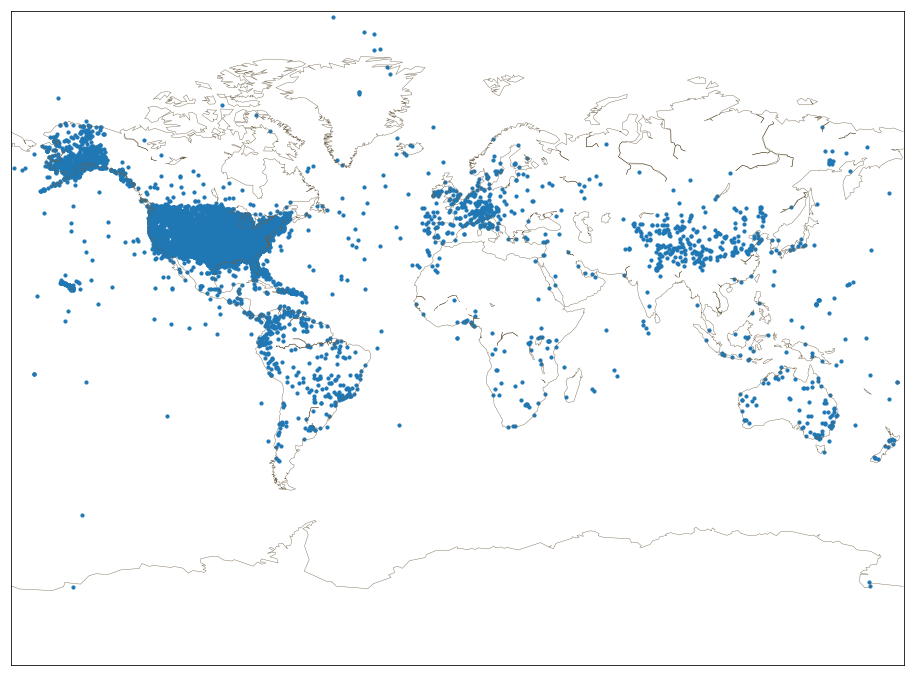

In [133]:
m = Basemap(projection='mill',lon_0=0)
plt.figure(figsize=(16,16))

m.drawcoastlines(color='#6D5F47', linewidth=.4)

longitudes= data['Longitude'].tolist()
latitudes= data['Latitude'].tolist()
m.scatter(longitudes, latitudes, s=10, latlon=True)

In [134]:
data.head(20)

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date |,US State,Event Month,Event Year,Make Model,Total Victims
0,20150908X74637,Accident,CEN15LA402,2015-09-08,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,clarke reginald w,dragonfly mk,NaN,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,1.0,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |,IL,9.0,2015.0,clarke reginald w dragonfly mk,NaN
1,20150906X32704,Accident,ERA15LA339,2015-09-05,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,evolution aircraft inc,revo,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,09/10/2015 |,NH,9.0,2015.0,evolution aircraft inc revo,NaN
2,20150908X00229,Accident,GAA15CA251,2015-09-04,"Hayes, SD",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,air tractor inc,at 402a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,|,SD,9.0,2015.0,air tractor inc at 402a,NaN
3,20150903X33216,Accident,WPR15FA256,2015-09-03,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,piper,pa28,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015 |,CA,9.0,2015.0,piper pa28,NaN
4,20150903X34535,Accident,ERA15LA338,2015-09-03,"Cresskill, NJ",United States,40.935833,-73.958611,NaN,NaN,Non-Fatal,Destroyed,Airplane,N758DK,cessna,r172k,No,1.0,Reciprocating,Public Use,NaN,Aerial Observation,NaN,NaN,2.0,NaN,NaN,VMC,NaN,Preliminary,09/10/2015 |,NJ,9.0,2015.0,cessna r172k,NaN
5,20150902X74630,Accident,ERA15FA336,2015-09-02,"Bon Aqua, TN",United States,35.935000,-87.252500,NaN,NaN,Fatal(1),Substantial,Airplane,N216LA,henderson w a/johnson w l,rv 6a,Yes,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,NaN,NaN,NaN,VMC,NaN,Preliminary,09/08/2015 |,TN,9.0,2015.0,henderson w a/johnson w l rv 6a,NaN
6,20150902X51516,Accident,ERA15FA335,2015-09-02,"Advance, NC",United States,35.914444,-80.462222,8A7,Twin Lakes Airport,Fatal(2),Destroyed,Airplane,N393MC,cooper michael c,rv 8a,Yes,NaN,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,2.0,NaN,NaN,NaN,VMC,NaN,Preliminary,09/10/2015 |,NC,9.0,2015.0,cooper michael c rv 8a,NaN
7,20150902X73001,Accident,WPR15LA255,2015-09-01,"Jerome, ID",United States,42.721667,-114.439166,JER,JEROME COUNTY,Non-Fatal,Destroyed,Airplane,N4BM,extra flugzeugbau gmbh,ea 300/l,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,1.0,NaN,NaN,VMC,MANEUVERING,Preliminary,09/10/2015 |,ID,9.0,2015.0,extra flugzeugbau gmbh ea 300/l,NaN
8,20150901X74304,Accident,GAA15CA244,2015-09-01,"Truckee, CA",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N786AB,joe salomone,super cub sq2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,|,CA,9.0,2015.0,joe salomone super cub sq2,NaN
9,20150901X92332,Accident,CEN15LA392,2015-08-31,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,Non-Fatal,Substantial,Airplane,N452CS,cessna,t240,No,NaN,NaN,Part 91: General Aviation,NaN,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Preliminary,09/04/2015 |,TX,8.0,2015.0,cessna t240,NaN
